This file creates a model based on MAL dataset

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [107]:
mal_df = pd.read_pickle('mal_top50_mvp.pkl')

In [97]:
mal_df.head(10)

,Title,URL,English,Synonyms,Japanese,Type,Episodes,Status,Aired,Premiered,...,Popularity,Members,Favorites,Started,Ended,Voters,Rating score,OVA,TV,Total length
0,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,Fullmetal Alchemist: Brotherhood,"Hagane no Renkinjutsushi: Fullmetal Alchemist,...",鋼の錬金術師 FULLMETAL ALCHEMIST,TV,64.0,Finished Airing,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,...,#4,1736413.0,148754.0,2009-04-05,2010-07-04,1040597.0,3.0,NaN,NaN,1536.0
1,Steins;Gate,https://myanimelist.net/anime/9253/Steins_Gate,Steins;Gate,NaN,STEINS;GATE,TV,24.0,Finished Airing,"Apr 6, 2011 to Sep 14, 2011",Spring 2011,...,#7,1419119.0,124340.0,2011-04-06,2011-09-14,767500.0,2.0,NaN,NaN,576.0
2,Gintama°,https://myanimelist.net/anime/28977/Gintama°,Gintama Season 4,Gintama' (2015),銀魂°,TV,51.0,Finished Airing,"Apr 8, 2015 to Mar 30, 2016",Spring 2015,...,#340,304607.0,8254.0,2015-04-08,2016-03-30,106198.0,2.0,NaN,NaN,1224.0
3,Hunter x Hunter (2011),https://myanimelist.net/anime/11061/Hunter_x_H...,Hunter x Hunter,HxH (2011),HUNTER×HUNTER（ハンター×ハンター）,TV,148.0,Finished Airing,"Oct 2, 2011 to Sep 24, 2014",Fall 2011,...,#18,1156789.0,103896.0,2011-10-02,2014-09-24,637854.0,2.0,NaN,NaN,3404.0
4,Ginga Eiyuu Densetsu,https://myanimelist.net/anime/820/Ginga_Eiyuu_...,Legend of the Galactic Heroes,"LoGH, LotGH, Gin'eiden, GinEiDen, Heldensagen ...",銀河英雄伝説,OVA,110.0,Finished Airing,"Jan 8, 1988 to Mar 17, 1997",NaN,...,#624,186272.0,11724.0,1988-01-08,1997-03-17,41798.0,3.0,NaN,NaN,2860.0
5,Gintama',https://myanimelist.net/anime/9969/Gintama,Gintama Season 2,Gintama (2011),銀魂',TV,51.0,Finished Airing,"Apr 4, 2011 to Mar 26, 2012",Spring 2011,...,#347,294861.0,5412.0,2011-04-04,2012-03-26,122194.0,2.0,NaN,NaN,1224.0
6,Shingeki no Kyojin Season 3 Part 2,https://myanimelist.net/anime/38524/Shingeki_n...,Attack on Titan Season 3 Part 2,NaN,進撃の巨人 Season3 Part.2,TV,10.0,Finished Airing,"Apr 29, 2019 to Jul 1, 2019",Spring 2019,...,#135,547257.0,18298.0,2019-04-29,2019-07-01,316489.0,3.0,NaN,NaN,230.0
7,Kimi no Na wa.,https://myanimelist.net/anime/32281/Kimi_no_Na_wa,Your Name.,NaN,君の名は。,Movie,1.0,Finished Airing,"Aug 26, 2016",NaN,...,#14,1250436.0,57044.0,2016-08-26,NaT,815621.0,2.0,NaN,NaN,106.0
8,Gintama': Enchousen,https://myanimelist.net/anime/15417/Gintama__E...,Gintama: Enchousen,"Gintama' (2012), Gintama' Overdrive, Kintama",銀魂' 延長戦,TV,13.0,Finished Airing,"Oct 4, 2012 to Mar 28, 2013",Fall 2012,...,#663,177043.0,1991.0,2012-10-04,2013-03-28,87213.0,2.0,NaN,NaN,312.0
9,3-gatsu no Lion 2nd Season,https://myanimelist.net/anime/35180/3-gatsu_no...,March Comes In Like A Lion 2nd Season,Sangatsu no Lion Second Season,3月のライオン 第2シリーズ,TV,22.0,Finished Airing,"Oct 14, 2017 to Mar 31, 2018",Fall 2017,...,#615,189526.0,7430.0,2017-10-14,2018-03-31,85457.0,2.0,NaN,NaN,550.0


In [53]:
mal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Title       50 non-null     object        
 1   URL         50 non-null     object        
 2   English     45 non-null     object        
 3   Synonyms    36 non-null     object        
 4   Japanese    50 non-null     object        
 5   Type        50 non-null     object        
 6   Episodes    50 non-null     int64         
 7   Status      50 non-null     object        
 8   Aired       50 non-null     object        
 9   Premiered   38 non-null     object        
 10  Broadcast   38 non-null     object        
 11  Producers   50 non-null     object        
 12  Licensors   50 non-null     object        
 13  Studios     50 non-null     object        
 14  Source      50 non-null     object        
 15  Genres      50 non-null     object        
 16  Duration    50 non-null     

In [6]:
mal_df.columns

Index(['Title', 'Type', 'Episodes', 'Started', 'Duration', 'Score', 'Rating'], dtype='object')

In [96]:
mal_df['Type'].value_counts()

TV       38
Movie    10
OVA       2
Name: Type, dtype: int64

In [108]:
mal_df_typedummy = pd.get_dummies(mal_df['Type'], drop_first=True)

In [99]:
mal_df_typedummy.columns

Index(['OVA', 'TV'], dtype='object')

In [110]:
mal_df = pd.concat([mal_df, mal_df_typedummy], axis=1)

In [111]:
mal_df.head(5)

,Title,URL,English,Synonyms,Japanese,Type,Episodes,Status,Aired,Premiered,...,Score,Ranked,Popularity,Members,Favorites,Started,Ended,Voters,OVA,TV
0,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,Fullmetal Alchemist: Brotherhood,"Hagane no Renkinjutsushi: Fullmetal Alchemist,...",鋼の錬金術師 FULLMETAL ALCHEMIST,TV,64,Finished Airing,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,...,9.23,#1,#4,1736413,148754,2009-04-05,2010-07-04,1040597,0,1
1,Steins;Gate,https://myanimelist.net/anime/9253/Steins_Gate,Steins;Gate,NaN,STEINS;GATE,TV,24,Finished Airing,"Apr 6, 2011 to Sep 14, 2011",Spring 2011,...,9.13,#2,#7,1419119,124340,2011-04-06,2011-09-14,767500,0,1
2,Gintama°,https://myanimelist.net/anime/28977/Gintama°,Gintama Season 4,Gintama' (2015),銀魂°,TV,51,Finished Airing,"Apr 8, 2015 to Mar 30, 2016",Spring 2015,...,9.12,#3,#340,304607,8254,2015-04-08,2016-03-30,106198,0,1
3,Hunter x Hunter (2011),https://myanimelist.net/anime/11061/Hunter_x_H...,Hunter x Hunter,HxH (2011),HUNTER×HUNTER（ハンター×ハンター）,TV,148,Finished Airing,"Oct 2, 2011 to Sep 24, 2014",Fall 2011,...,9.12,#4,#18,1156789,103896,2011-10-02,2014-09-24,637854,0,1
4,Ginga Eiyuu Densetsu,https://myanimelist.net/anime/820/Ginga_Eiyuu_...,Legend of the Galactic Heroes,"LoGH, LotGH, Gin'eiden, GinEiDen, Heldensagen ...",銀河英雄伝説,OVA,110,Finished Airing,"Jan 8, 1988 to Mar 17, 1997",NaN,...,9.11,#5,#624,186272,11724,1988-01-08,1997-03-17,41798,1,0


In [50]:
mal_df['Rating'].value_counts()

PG-13 - Teens 13 or older         30
R - 17+ (violence & profanity)    16
PG - Children                      2
R+ - Mild Nudity                   1
G - All Ages                       1
Name: Rating, dtype: int64

In [59]:
mal_rating_map = {  'G - All Ages': 0,
                    'PG - Children': 1,
                    'PG-13 - Teens 13 or older': 2,
                    'R - 17+ (violence & profanity)': 3,
                    'R+ - Mild Nudity': 4
                    'R'}

In [112]:
mal_df['Rating score'] = mal_df['Rating'].replace(mal_rating_map)

In [113]:
mal_df['Total length'] = mal_df['Episodes'] * mal_df['Duration']

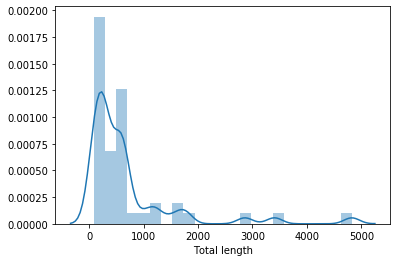

In [32]:
sns.distplot(mal_df['Total length']);

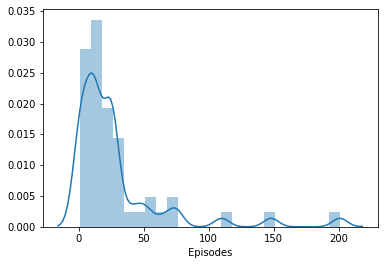

In [42]:
sns.distplot(mal_df['Episodes']);

In [119]:
mal_columns = ['Score', 'TV', 'OVA', 'Total length', 'Members', 'Rating score', 'Favorites']

In [114]:
mal_df_tvonly = mal_df[mal_df.TV == 1]

In [120]:
mal_df_mvp = mal_df[mal_columns]

In [117]:
mal_df_mvp.head(5)

,Score,Total length,Members,Favorites
0,9.23,1536,1736413,148754
1,9.13,576,1419119,124340
2,9.12,1224,304607,8254
3,9.12,3404,1156789,103896
5,9.10,1224,294861,5412


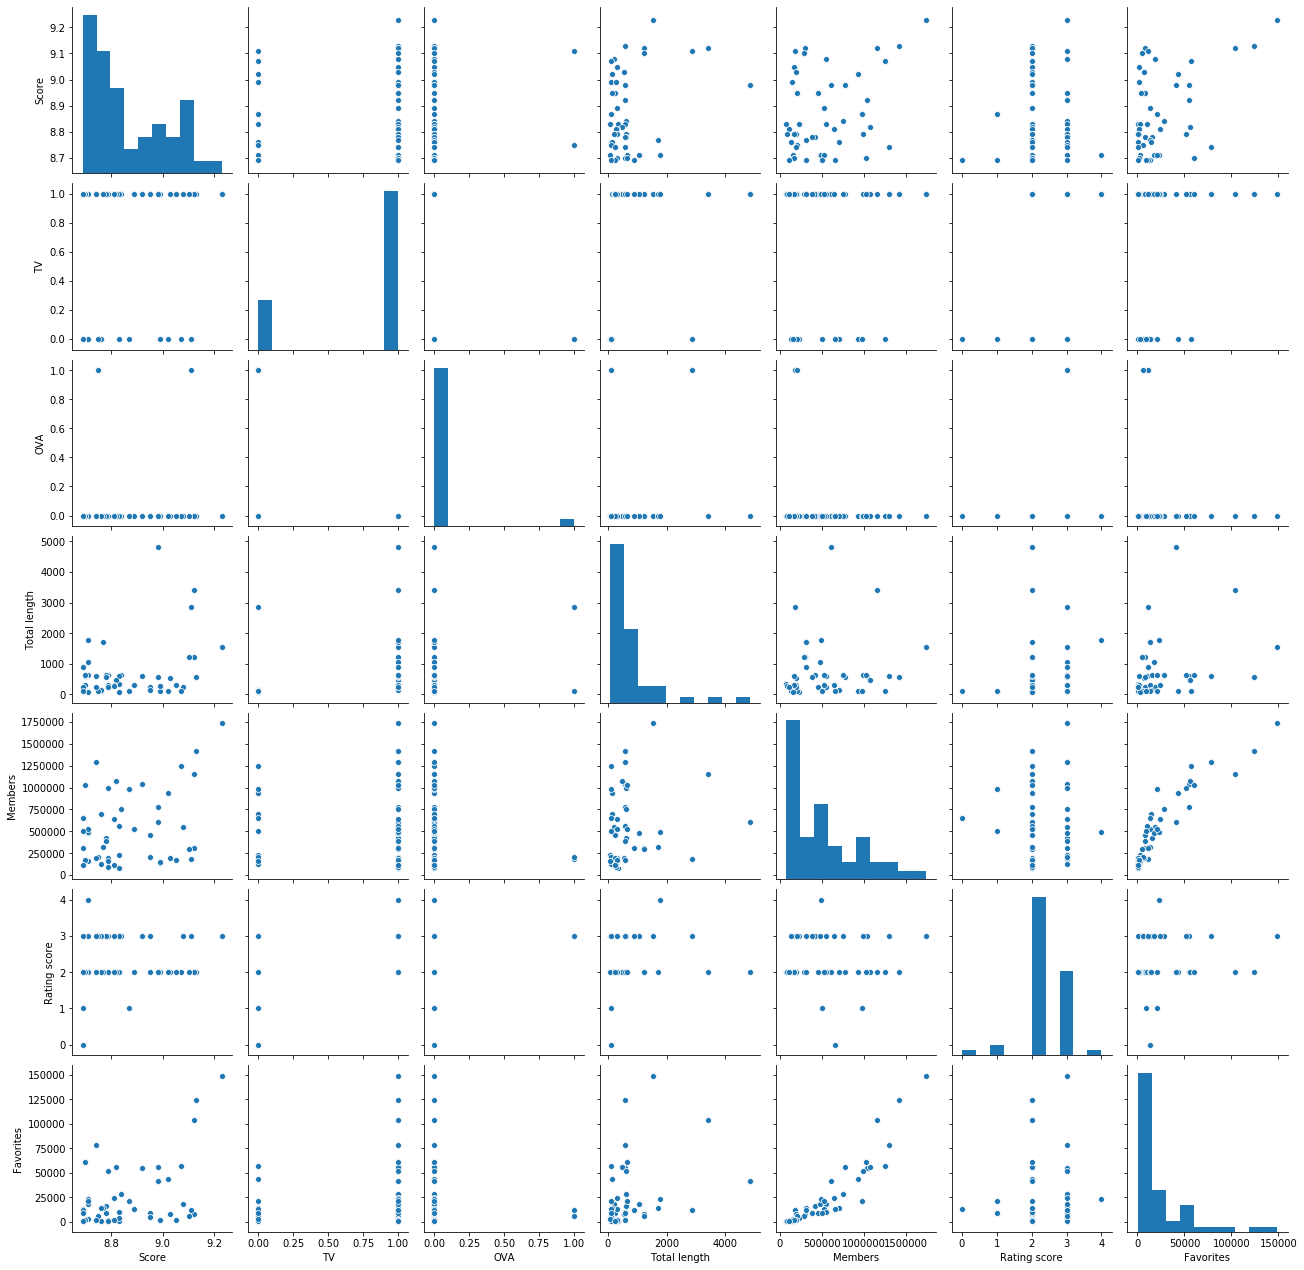

In [121]:
sns.pairplot(mal_df_mvp)